<a href="https://colab.research.google.com/github/Kantapon1939/Iran_protest/blob/main/Iran_protest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection and preparation

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
# import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## To import a CSV file from your Google Drive into Google Colab

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/tweets.csv'
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589600 entries, 0 to 589599
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         589590 non-null  object 
 1   user_location     242804 non-null  object 
 2   user_description  452456 non-null  object 
 3   user_created      589590 non-null  object 
 4   user_followers    589590 non-null  float64
 5   user_friends      589590 non-null  object 
 6   user_favourites   589590 non-null  object 
 7   user_verified     589590 non-null  object 
 8   date              589590 non-null  object 
 9   text              589589 non-null  object 
 10  hashtags          368481 non-null  object 
 11  source            589587 non-null  object 
dtypes: float64(1), object(11)
memory usage: 54.0+ MB
None


In [ ]:
# get the memory usage in MB
memory_mb = df.memory_usage().sum() / (1024 * 1024)

print(f"The dataframe uses {memory_mb:.2f} MB of memory")

The dataframe uses 53.98 MB of memory


In [ ]:
# original dataframe size
df.shape

(589600, 12)

In [ ]:
# Set the display option
pd.set_option('display.max_colwidth', None)

In [ ]:
import seaborn as sns

## null distributions
cmap = sns.light_palette("#0000FF", as_cmap=True)  # light blue color
nulls = df.isnull().sum().reset_index(name='null count')
nulls.style.background_gradient(cmap=cmap)

,index,null count
0,user_name,10
1,user_location,346796
2,user_description,137144
3,user_created,10
4,user_followers,10
5,user_friends,10
6,user_favourites,10
7,user_verified,10
8,date,10
9,text,11


In [ ]:
# ready dataframe size without null
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.shape

(136102, 12)

In [ ]:
# convert string to date format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f')
df['hour'] = df.date.dt.hour
df['month'] = df.date.dt.month_name()

## Hashtag trends

In [ ]:
from collections import Counter
top_hashtags = Counter(",".join([x.replace('[','').replace(']','').replace("'",'').replace(' ','')
                                 for x in df.hashtags.value_counts().index.tolist()]).split(','))
vals = [count for tag, count in top_hashtags.most_common(20)]
keys = [tag for tag, count in top_hashtags.most_common(20)]

<ipython-input-60-fdc5936a2b63>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1605 (\N{ARABIC LETTER MEEM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1607 (\N{ARABIC LETTER HEH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1587 (\N{A

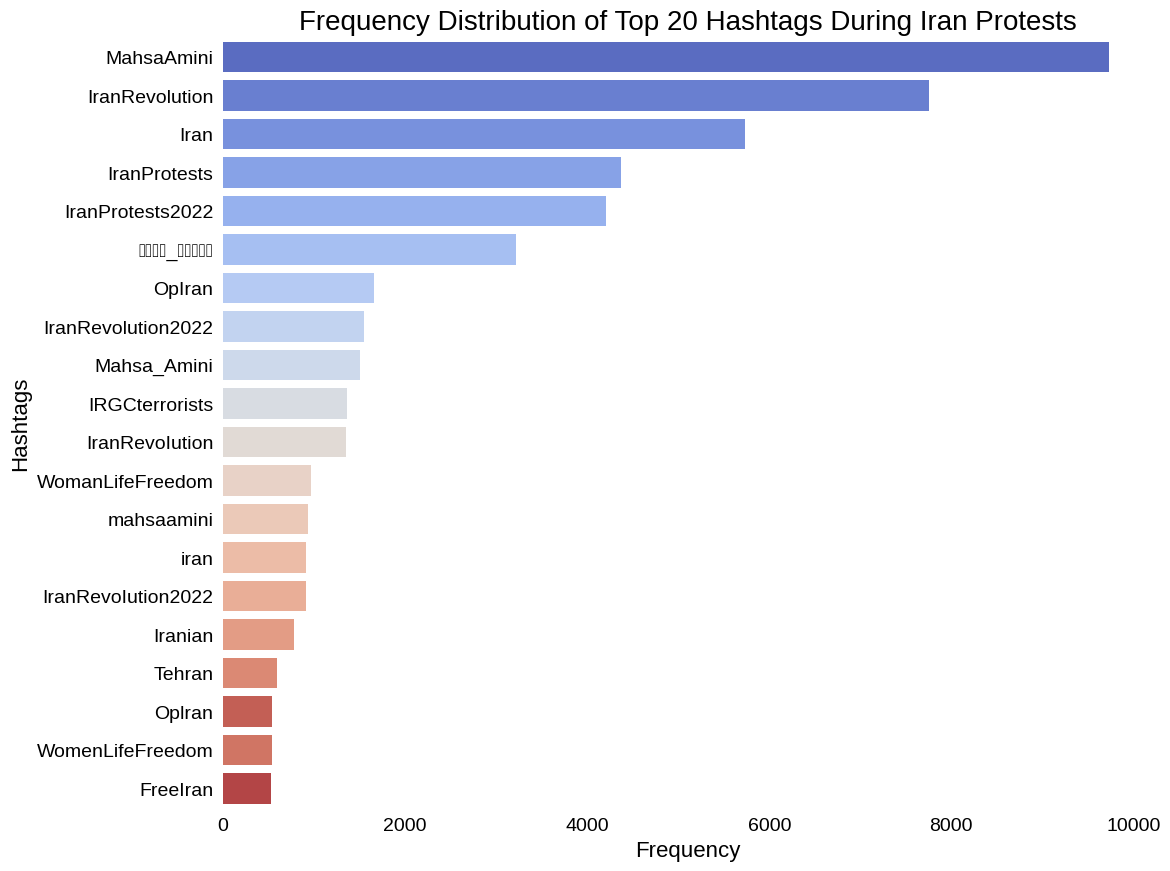

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Using seaborn's colorful 'coolwarm' palette
plt.style.use("seaborn")
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# Create a color palette which gets brighter with increasing values
palette = sns.color_palette("coolwarm", len(vals))

# Sort vals in ascending order and create a rank column
data = pd.DataFrame({'Hashtags': keys, 'Frequency': vals})
data.sort_values('Frequency', ascending=False, inplace=True)
data['rank'] = data['Frequency'].rank(method='first')

plt.figure(figsize=(12,10))
sns.barplot(x='Frequency', y='Hashtags', data=data, orient='h', palette=np.array(palette[::-1])[data['rank'].astype(int) - 1])
plt.xlabel('Frequency', fontsize=16, color='black')
plt.ylabel('Hashtags', fontsize=16, color='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.title("Frequency Distribution of Top 20 Hashtags During Iran Protests", fontsize=20, color='black')
plt.grid(False)
plt.show()


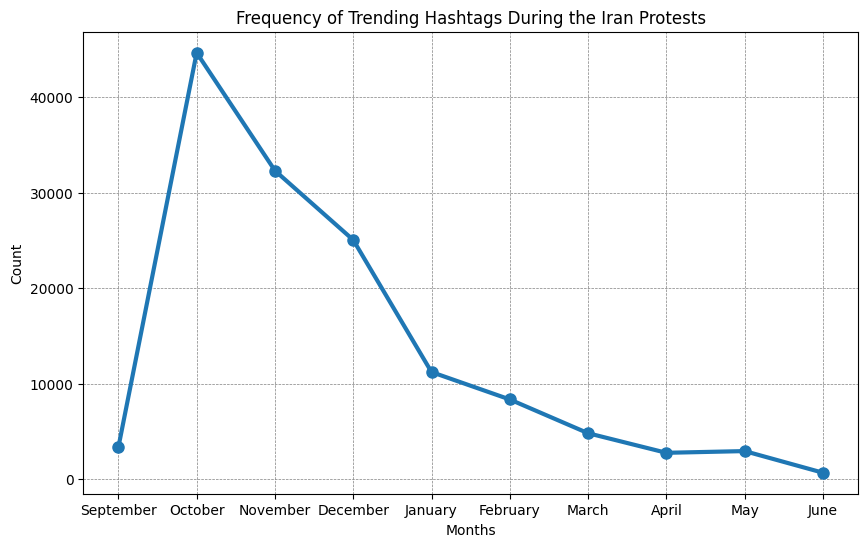

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

months = ["September", "October", "November", "December", "January", "February", "March", "April", "May", "June"]

df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

month_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

plt.plot(month_counts.index, month_counts.values, color='#1f77b4', linewidth=3, marker='o', markersize=8)

plt.title('Frequency of Trending Hashtags During the Iran Protests')
plt.xlabel('Months')
plt.ylabel('Count')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()





In [ ]:
# ready dataframe size between September and January
# List of desired months
desired_months = ["September", "October", "November", "December"]

# Filter the dataframe to only include the desired months
df = df[df['month'].isin(desired_months)]
df.shape

(105341, 14)

## Langauges

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

model_ckpt = 'papluca/xlm-roberta-base-language-detection'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt)

language_detector = TextClassificationPipeline(model=model, tokenizer=tokenizer)


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
text = "This is some text to classify"
print(language_detector(text))

[{'label': 'en', 'score': 0.9913840293884277}]


In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()
df['language'] = df['text'].progress_apply(lambda x: language_detector(x)[0]['label'])



  0%|          | 0/105341 [00:00<?, ?it/s]

In [ ]:
output_path = '/content/drive/My Drive/tweets_filtered.csv'
df.to_csv(output_path, index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/tweets_filtered.csv'
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
df.shape

(105341, 15)

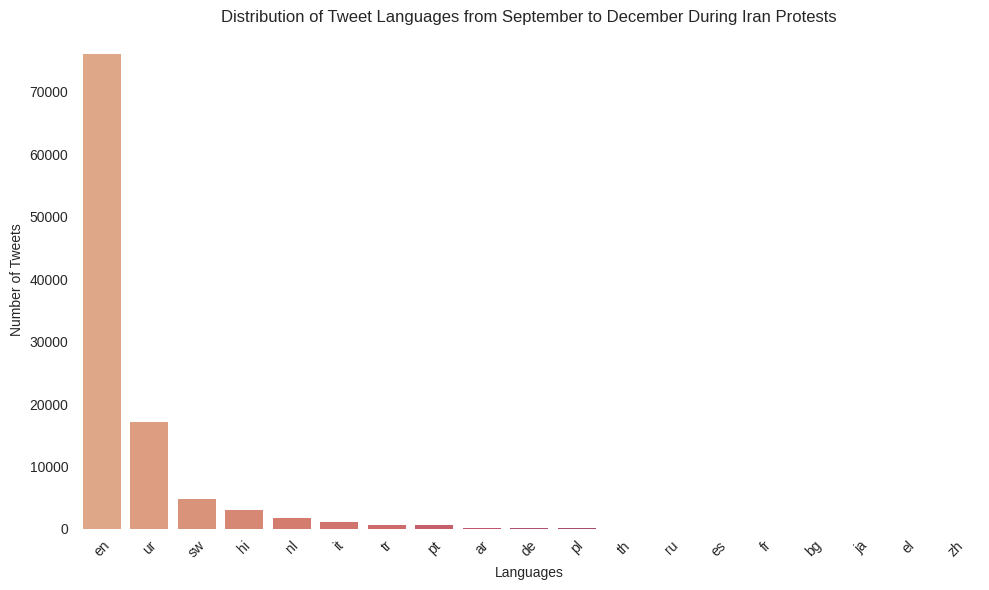

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a figure with proper size
plt.figure(figsize=(10, 6))

# Order categories from most common to least common
order = df['language'].value_counts().index

# Seaborn's countplot creates a histogram. Set the data, x-axis, and color palette.
# Include the 'order' parameter to order the bars
sns.countplot(data=df, x='language', palette='flare', order=order)

# Set the title, xlabel, and ylabel
plt.title("Distribution of Tweet Languages from September to December During Iran Protests", fontsize=12)
plt.xlabel("Languages", fontsize=10)
plt.ylabel("Number of Tweets", fontsize=10)

# Improve legibility
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()





In [ ]:
# Filter df to include only rows where 'language' is 'en'
df = df[df['language'] == 'en']


In [ ]:
output_path = '/content/drive/My Drive/tweets_filtered_eng.csv'
df.to_csv(output_path, index=False)

In [ ]:
file_path = '/content/drive/My Drive/tweets_filtered_eng.csv'
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
## Sample data in text
df[['text',]].sample(10)

,text
12870,support Iranian people:We see you! we hear you! Letting the world know! Streets belong to people. #mahsaamini\n#womenlifefreedom\n#iranrevolution2022\n#eyesoniran\npray and do dua for this little angel 🥰😭😭💔💔💔 https://t.co/RGyXvsMZOw
40575,Good on them! Hopefully soon #Iranians will be able to travel and interact with the #UK without their horrendous regime keeping them down. #IranRevolution #Iran https://t.co/GWtf4JoZch
36997,"Every protester killed by the Islamic Republic of Iran has a story, a life, and ambitions. \n\nThis is #NasrinGhaderi, a 35-year old PhD candidate in philosophy from the Kurdish-Iranian city of Marivan. \n\n#MahsaAmini\n#IranRevolution \n\n https://t.co/kiyxLxYAZZ"
46919,A beautiful heartwarming moment amid a lot of darkness. #Iran #IranProtests #IranProtests2022 https://t.co/zwqLQufTxI
74276,"@UN_Women Please #Standup4HumanRights be the voice of #MahsaAmini &amp; #IranProtests2022 , #IranRevolution2022 who seek #Democracy &amp; fight for freedom. WOMEN LIFE FREEDOM #FreeIran #No2IR"
53513,Please support the #Iranians in their heroic fight against the #fascist Islamic Republic!\n\n@POTUS @SecBlinken @EmmanuelMacron @Bundeskanzler @ABaerbock @UNHumanRights\n\n#MahsaAmini #IranianWomenLivesMatter #WomensRights #IranRevoIution #IranProtest #IranianProtests2022 https://t.co/EtB3TUsocZ
68487,Glory and safety to the brave women of Iran! ✌️🇮🇷💪🇮🇷✊🇮🇷🕊 #IranProtests #IranRevolution2022 https://t.co/BUDpnvhxiY
73959,"@shallyzomorodi We want to change this brutal cruel terrorist Islamic regime in #Iran , help us , be our voice , we need more proper action better than you have done before. #MahsaAmini #IranRevolution #IranProtests"
41949,@robreiner That is one more reason why we need to stand with brave #IranianWomen who R fighting the evil Iran Govt empty-handed for women's rights and human rights!\n#Mahsa_Aminiمهساامینی #Sarina_Esmailzadeh #Nika_Shakarami #HadisNajafi #IranRevolution2022 #WomensRights #Woman_Life_Freedom


In [ ]:
df.shape

(76065, 15)

In [ ]:
df.text

0                      @__Injaneb96 #IranProtests should set up a space similar to the #TwitterSpaces @MriyaReport ... this space reports on the #Ukraine war and runs 24 hours a day with various hosts of different backgrounds. I am hoping for the best outcome of the #IranRevolution and #IranianWomen
1                                #IranProtests  #IranRevolution  #MashaAmini  #اعتراضات_سراسری   #زن_زندگی_ازادی  #IranRevolution2023 \nFriends, Comrades, Sisters, Brothers of #Iran happy year 1402 -2023 in a Free Iran without Khamenei, without Bassij, without Sepahi, without Salami and without IRGC
2                                                               All people who fight for for #HumanRights #CivilRights need to support the unprecedented #IranRevolution The people of #Iran want their voices heard, they demand change, lets help them!#IranianWomen #IranProtests https://t.co/gEvznRuLc7
3                         The anti-Islam, anti-patriarchy protests continue in #Iran.\n\nNot that

# Data Preprocessing

In [ ]:
import pandas as pd
import emoji

def convert_emoji(df):
    df['text'] = df['text'].apply(emoji.demojize)  # Apply emoji conversion on 'text' column
    return df

df = convert_emoji(df)



In [ ]:
# ready dataframe size without null
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.shape

(76065, 15)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

contraction_dict = [(r"I\'m", "I am"), (r"i\'m", "i am"), (r"ain\'t", "am not"), (r"(\w+)\'s", "\g<1> is"), (r"(\w+)\'re", "\g<1> are"),
                    (r"(\w+)n\'t", "\g<1> not"), (r"can\'t", "cannot"), (r"won\'t", "will not"), (r"wont", "will not"), (r"(\w+)\'ll", "\g<1> will"),
                    (r"(\w+)\'d", "\g<1> would"), (r"(\w+)\'ve", "\g<1> have"), (r"I\’m", "I am"), (r"i\’m", "i am"), (r"ain\’t", "am not"),
                    (r"(\w+)\’s", "\g<1> is"), (r"(\w+)\’re", "\g<1> are"), (r"(\w+)n\’t", "\g<1> not"), (r"can\’t", "cannot"), (r"won\’t", "will not"),
                    (r"(\w+)\’ll", "\g<1> will"), (r"(\w+)\’d", "\g<1> would"), (r"(\w+)\’ve", "\g<1> have")]

# The function to handle repeated characters
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new

# The function to check each word in a tweet
def check_repeated(tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]
    for word in word_set:
        if not wordnet.synsets(word):
            tweet = re.sub(word, repeated_char(word), tweet)
    return tweet

# The function to handle contractions
def handle_contraction(text):
    contraction_patterns = [(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in contraction_patterns:
        text = re.sub(pattern, repl, text)
    return text

# The function to replace non-alphabetical characters with a space
def replace_non_alphabetical(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

# The function to remove short words
def remove_short_words(text):
    return ' '.join([w for w in text.split() if len(w) > 2 or w == "no"])

# The preprocessing function
def preprocessing(df):
    df['text'] = df['text'].str.lower()
    df['text'] = df['text'].replace(r'@\w+', '', regex=True)
    df['text'] = df['text'].replace(r'http\S+|https\S+|www\S+', '', regex=True)
    df['text'] = df['text'].replace(r'#(\w+)', r'\1', regex=True)
    df['text'] = df['text'].apply(check_repeated)
    df['text'] = df['text'].apply(handle_contraction)
    df['text'] = df['text'].apply(replace_non_alphabetical)
    df['text'] = df['text'].apply(remove_short_words)
    return df

df = preprocessing(df)




[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])
# Updated preprocessing function
def preprocessing(df):
    df['text'] = df['text'].str.lower()
    df['text'] = df['text'].replace(r'@\w+', '', regex=True)
    df['text'] = df['text'].replace(r'http\S+|https\S+|www\S+', '', regex=True)
    df['text'] = df['text'].replace(r'#(\w+)', r'\1', regex=True)
    df['text'] = df['text'].apply(check_repeated)
    df['text'] = df['text'].apply(handle_contraction)
    df['text'] = df['text'].apply(replace_non_alphabetical)
    df['text'] = df['text'].apply(remove_short_words)
    df['text'] = df['text'].apply(remove_stopwords) # remove stopwords
    return df

df = preprocessing(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.text

0                                         iranprotests set space similar twiterspaces space reports ukraine war runs hours day various hosts different backgrounds hoping best outcome iranrevolution iranianwomen
1                       iranprotests iranrevolution mashamini iranrevolution friends comrades sisters brothers iran happy year free iran without khamenei without basij without sepahi without salami without irgc
2                                                   people fight humanrights civilrights need support unprecedented iranrevolution people iran want voices heard demand change lets help iranianwomen iranprotests
3                                                         anti islam anti patriarchy protests continue iran irish feminists give toss care issues convenient easy frauds lot iranrevolution iranprotests mahsamini
4                                                                             continuing cruel persecution iranians eyes villains year khamenei amp raisi ir

In [ ]:
output_path = '/content/drive/My Drive/tweets_cleaning_prep.csv'
df.to_csv(output_path, index=False)

In [ ]:

import nltk
nltk.download('wordnet')
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
word_lemmatizer = nltk.stem.WordNetLemmatizer()

#tokenization
def tokenize_tweets(df):
    df['tokens'] = df['text'].str.split()
    return df
#lemmatize and stemming
df = tokenize_tweets(df)
def lemmatize_text(df):
    df['lemma'] = df['text'].apply(lambda text: [word_lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(text)])
    return df

df = lemmatize_text(df)
#lemmatization in sentence
df['lemma_sentence'] = df['lemma'].apply(lambda x: ' '.join(x))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#POS for clean tweets
#reference:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
#https://stackoverflow.com/questions/51267166/lemmatization-pandas-python

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary resources
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

word_lemmatizer = WordNetLemmatizer()

def convert_wordnet_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def pos_tag_set(tweet):
    tagged_words = nltk.pos_tag(nltk.word_tokenize(tweet))
    new_tag=[]
    for word, tag in tagged_words:
        new_tag.append(tuple([word, convert_wordnet_tag(tag)]))
    return new_tag

def handle_lemma(pos_tweet):
    lemma_set = " "
    for word, pos in pos_tweet:
        if not pos:
            lemma = word
            lemma_set = lemma_set + " " + lemma
        else:
            lemma = word_lemmatizer.lemmatize(word, pos=pos)
            lemma_set = lemma_set + " " + lemma
    return lemma_set

def lemmatize_and_pos_tag(df):
    df['lemma'] = df['text'].apply(lambda text: [word_lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    df['pos_tag'] = df['text'].apply(pos_tag_set)
    df['lemma_sentence(with POS)'] = df['pos_tag'].apply(handle_lemma)
    return df

df = lemmatize_and_pos_tag(df)
df.head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,hour,month,language,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS)
0,No Excuses 💙🇺🇸🇺🇦🌻,Space,#VoteBlue to save our Democracy. Support Ukraine with a donation to https://t.co/RMZicrP0cj\nViolence in any form is unacceptable https://t.co/zSY6XsKHkh,2008-08-10 02:28:16+00:00,930.0,4993.0,35705.0,False,2022-12-31 23:50:09+00:00,iranprotests set space similar twiterspaces space reports ukraine war runs hours day various hosts different backgrounds hoping best outcome iranrevolution iranianwomen,"['IranProtests', 'TwitterSpaces']",Twitter Web App,23,December,en,"[iranprotests, set, space, similar, twiterspaces, space, reports, ukraine, war, runs, hours, day, various, hosts, different, backgrounds, hoping, best, outcome, iranrevolution, iranianwomen]","[iranprotests, set, space, similar, twiterspaces, space, report, ukraine, war, run, hour, day, various, host, different, background, hoping, best, outcome, iranrevolution, iranianwomen]",iranprotests set space similar twiterspaces space report ukraine war run hour day various host different background hoping best outcome iranrevolution iranianwomen,"[(iranprotests, n), (set, v), (space, n), (similar, a), (twiterspaces, n), (space, n), (reports, n), (ukraine, a), (war, n), (runs, n), (hours, n), (day, n), (various, a), (hosts, n), (different, a), (backgrounds, n), (hoping, v), (best, a), (outcome, a), (iranrevolution, n), (iranianwomen, n)]",iranprotests set space similar twiterspaces space report ukraine war run hour day various host different background hop best outcome iranrevolution iranianwomen
1,Bruno Azadi,Planète Terre,Class War & Rock'n'Roll - Blocked by some NIAC jesters and I don't care,2022-01-28 17:38:04+00:00,91.0,174.0,13590.0,False,2022-12-31 23:00:55+00:00,iranprotests iranrevolution mashamini iranrevolution friends comrades sisters brothers iran happy year free iran without khamenei without basij without sepahi without salami without irgc,"['IranProtests', 'IranRevolution', 'MashaAmini', 'اعتراضات_سراسری', 'زن_زندگی_ازادی', 'IranRevolution2023']",Twitter Web App,23,December,en,"[iranprotests, iranrevolution, mashamini, iranrevolution, friends, comrades, sisters, brothers, iran, happy, year, free, iran, without, khamenei, without, basij, without, sepahi, without, salami, without, irgc]","[iranprotests, iranrevolution, mashamini, iranrevolution, friend, comrade, sister, brother, iran, happy, year, free, iran, without, khamenei, without, basij, without, sepahi, without, salami, without, irgc]",iranprotests iranrevolution mashamini iranrevolution friend comrade sister brother iran happy year free iran without khamenei without basij without sepahi without salami without irgc,"[(iranprotests, n), (iranrevolution, v), (mashamini, a), (iranrevolution, n), (friends, n), (comrades, v), (sisters, n), (brothers, n), (iran, v), (happy, a), (year, n), (free, a), (iran, n), (without, None), (khamenei, n), (without, None), (basij, n), (without, None), (sepahi, n), (without, None), (salami, n), (without, None), (irgc, n)]",iranprotests iranrevolution mashamini iranrevolution friend comrades sister brother iran happy year free iran without khamenei without basij without sepahi without salami without irgc
2,🇺🇦💙kellykenney 💙🇺🇦 🌊😎,"Independence, MO",Science edu #disabled #ParkinsonsDisease #Resister 💙 Vote #WomensRights #IranProtest #CivilRights #BLM #Democrat #Ukraine 🇺🇦 #BlueCrew #DemCast #BlueWave #FB,2022-11-09 01:52:18+00:00,3596.0,4717.0,25328.0,False,2022-12-31 22:52:53+00:00,people fight humanrights civilrights need support unprecedented iranrevolution people iran want voices heard demand change lets help iranianwomen iranprotests,"['HumanRights', 'CivilRights', 'IranRevolution']",Twitter for Android,22,December,en,"[people, fight, humanrights, civilrights, need, support, unprecedented, iranrevolution, people, iran, want, voices, h

In [ ]:
print(df['lemma_sentence(with POS)'])

0                                           iranprotests set space similar twiterspaces space report ukraine war run hour day various host different background hop best outcome iranrevolution iranianwomen
1                    iranprotests iranrevolution mashamini iranrevolution friend comrades sister brother iran happy year free iran without khamenei without basij without sepahi without salami without irgc
2                                                people fight humanrights civilrights need support unprecedented iranrevolution people iran want voice hear demand change let help iranianwomen iranprotests
3                                                       anti islam anti patriarchy protest continue iran irish feminist give toss care issue convenient easy fraud lot iranrevolution iranprotests mahsamini
4                                                                            continue cruel persecution iranian eye villain year khamenei amp raisi iranprotests iranrevolution mahs

In [ ]:
output_path = '/content/drive/My Drive/tweets_processing.csv'
df.to_csv(output_path, index=False)

In [ ]:
file_path = '/content/drive/My Drive/tweets_processing.csv'
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
## sample Post Processing
indices = [12870, 40575, 36997, 46919, 74276, 53513, 68487, 73959, 41949]
df.loc[indices, ['text','lemma_sentence(with POS)']]


,text,lemma_sentence(with POS)
33782,mahsamini opiran parhamparvari irgcterorists face symbols mouth face symbols mouth face symbols mouth brilliant young nations precious thing iran hope get rid unfair situation unbelievable world take quicker targetive international actions,mahsamini opiran parhamparvari irgcterorists face symbol mouth face symbol mouth face symbol mouth brilliant young nation precious thing iran hope get rid unfair situation unbelievable world take quicker targetive international action
68888,support iran women free oppression iranprotests iranianwomen,support iran woman free oppression iranprotests iranianwomen
423,sth situation javanroud extremely critical repressive forces islamic republic shooting unarmed citizens say burhaneliasi name killed today iranrevolution burhaneliasi javanroud iranrevolution,sth situation javanroud extremely critical repressive force islamic republic shooting unarmed citizen say burhaneliasi name kill today iranrevolution burhaneliasi javanroud iranrevolution
10889,regime wants shut internet completely near future please let silence mahsamini,regime want shut internet completely near future please let silence mahsamini
19853,barbaric regime wants fool world propaganda iranrevolution mahsamini,barbaric regime want fool world propaganda iranrevolution mahsamini
73581,vivid imagery around world mahsamini iranprotests,vivid imagery around world mahsamini iranprotests
5275,forgive sure soul already blood hands mahsamini,forgive sure soul already blood hand mahsamini
41949,one reason need stand brave iranianwomen fighting evil iran govt empty handed women rights human rights mahsa amini sarina esmailzadeh nika shakarami hadisnajafi iranrevolution womensrights woman life fredom,one reason need stand brave iranianwomen fight evil iran govt empty hand woman right human right mahsa amini sarina esmailzadeh nika shakarami hadisnajafi iranrevolution womensrights woman life fredom
5446,islamic republic terrorists finalized another freedom fighter execution order mohamadghobadlou grave danger free world must act order stop regime crimes humanity say name save life mahsamini stopexecutioniniran,islamic republic terrorist finalize another freedom fighter execution order mohamadghobadlou grave danger free world must act order stop regime crime humanity say name save life mahsamini stopexecutioniniran
32346,resistance look like powerful overview mahsamini iranrevolution aban bethevoice,resistance look like powerful overview mahsamini iranrevolution aban bethevoice


# Lexicon-based approaches with built-in libraries

## Textblob

In [ ]:
from textblob import TextBlob

def Polarity_score(tweet):
    return TextBlob(tweet).sentiment.polarity

def Subjectivity_score(tweet):
    return TextBlob(tweet).sentiment.subjectivity

df['textblob_polarity'] = df['lemma_sentence(with POS)'].apply(Polarity_score)
df['textblob_subjectivity'] = df['lemma_sentence(with POS)'].apply(Subjectivity_score)


In [ ]:
output_path = '/content/drive/My Drive/tweets_textblob_polari_sub.csv'
df.to_csv(output_path, index=False)

In [ ]:
file_path = '/content/drive/My Drive/tweets_textblob_polari_sub.csv'
df = pd.read_csv(file_path, low_memory = False)

## Label sentiment Textblob

In [ ]:
#sentiment
#for textblob
def senti_label(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [ ]:
#using senti_label (textblob)
df['senti_textblob'] = df['textblob_polarity'].apply(senti_label)
#counting
blob_1=df.groupby('senti_textblob').count()
print("textblob_step1:",blob_1["textblob_polarity"])
# Create a mapping dictionary
sentiment_dict = {-1: 'negative', 0: 'neutral', 1: 'positive'}

# Create a new column 'senti_label_textblob' by mapping the 'senti_textblob' values using the dictionary
df['senti_label_textblob'] = df['senti_textblob'].map(sentiment_dict)



textblob_step1: senti_textblob
-1    16561
 0    29234
 1    30270
Name: textblob_polarity, dtype: int64


In [ ]:
pd.set_option('display.max_colwidth', None)

# Get top 5 records for each sentiment category and select specific columns
top_negative = df.loc[df['senti_label_textblob'] == 'negative', ['lemma_sentence(with POS)', 'senti_label_textblob', 'textblob_polarity']].nsmallest(5, 'textblob_polarity')
top_positive = df.loc[df['senti_label_textblob'] == 'positive', ['lemma_sentence(with POS)', 'senti_label_textblob', 'textblob_polarity']].nlargest(5, 'textblob_polarity')
top_neutral = df.loc[df['senti_label_textblob'] == 'neutral', ['lemma_sentence(with POS)', 'senti_label_textblob', 'textblob_polarity']].head(5)

print("Top 5 Negative:")
print(top_negative)

print("Top 5 Positive:")
print(top_positive)

print("Top 5 Neutral:")
print(top_neutral)

# Get counts of all unique textblob_polarity values
polarity_counts = df['textblob_polarity'].value_counts()

# Print the most frequent polarity values
print("Most Frequent Polarity Values:")
print(polarity_counts.head())

# Filter out neutral sentiments
non_neutral = df[df['textblob_polarity'] != 0]

# Get counts of all unique textblob_polarity values
polarity_counts = non_neutral['textblob_polarity'].value_counts()

# Print the most frequent polarity values
print("Most Frequent Polarity Values (excluding neutral):")
print(polarity_counts.head())

# Separate out positive and negative sentiments
positive_sentiments = df[df['senti_label_textblob'] == 'positive']
negative_sentiments = df[df['senti_label_textblob'] == 'negative']

# Get counts of all unique textblob_polarity values for positive sentiments
positive_polarity_counts = positive_sentiments['textblob_polarity'].value_counts()

# Print the most frequent polarity values for positive sentiments
print("Most Frequent Polarity Values for Positive Sentiments:")
print(positive_polarity_counts.head())

# Get counts of all unique textblob_polarity values for negative sentiments
negative_polarity_counts = negative_sentiments['textblob_polarity'].value_counts()

# Print the most frequent polarity values for negative sentiments
print("\nMost Frequent Polarity Values for Negative Sentiments:")
print(negative_polarity_counts.head())







Top 5 Negative:
                                                                                                               lemma_sentence(with POS)  \
4       continue cruel persecution iranian eye villain year khamenei amp raisi iranprotests iranrevolution mahsamini hijab iran iranian   
434                            regime mercenary kill abolfazmehdipour protest babol september evil regime must overthrow iranrevolution   
691                                                time support iranrevolution womanlifefredom remember role time make terrible mistake   
841                                    evil islamicrepublic regime thug throw tear gas people car javanrod iran khamenei must mahsamini   
1229                                                                             outrageous terrorist regime bank europe iranrevolution   

     senti_label_textblob  textblob_polarity  
4                negative               -1.0  
434              negative               -1.0  
691     

In [ ]:
# Filtering records where textblob_polarity is 0.01
filtered_df = df[df['textblob_polarity'] == -0.40]['text']

# Determine the number of samples to take, ensuring it's not more than the available records
num_samples = min(10, len(filtered_df))

# Fetching a random sample of records from the 'text' column
sample_0_01 = filtered_df.sample(num_samples)

# Displaying the sample
print(f"Random Sample of {num_samples} texts with textblob_polarity = 0.01:")
print(sample_0_01)



Random Sample of 10 texts with textblob_polarity = 0.01:
57906    nothing better explains goal iran ongoing uprising breaking statue roholah khomeini founder islamic republic iranians know islamic regime founded behind years misery oppression iranprotests
35274                                                                                                                               iranprotests heart breaking broken heart broken heart broken heart
8486                                                        message iranian people world call protest fucking revolution iran iranprotests iranrevolution mahsamini womanlifefredom frefromhijab hijab
35581                                                                                                  barbaric beyond description iranian state must burnt fucking ground iranrevoiution iranprotests
57288                                                                                                                                             b

In [ ]:
import matplotlib.pyplot as plt
### This plot in R ###
# Assuming that 'subjectivity_score' is the column in your DataFrame where the subjectivity scores are stored.
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
     plt.scatter(df['textblob_polarity'][i], df['textblob_subjectivity'][i], color='Blue')
# plt.scatter(x,y,color)
plt.title('Scatter plot of Polarity and Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7b12de7c6d40> (for post_execute):


KeyboardInterrupt: ignored

## Analyze Polarity and Subjectivity

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd


# Sentiment categorization using the senti_label function
def senti_label(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

df['senti_textblob'] = df['textblob_polarity'].apply(senti_label)

# Count sentiment categories
blob_counts = df.groupby('senti_textblob').count()
print("textblob_step1:", blob_counts["textblob_polarity"])

# Map to readable sentiment labels
sentiment_dict = {-1: 'negative', 0: 'neutral', 1: 'positive'}
df['senti_label_textblob'] = df['senti_textblob'].map(sentiment_dict)

# Calculate percentages
sentiment_percentages = df['senti_label_textblob'].value_counts(normalize=True) * 100

# Categorize subjectivity
subjectivity_threshold = 0.5
df['subjectivity_category'] = 'factual'
df.loc[df['textblob_subjectivity'] > subjectivity_threshold, 'subjectivity_category'] = 'personal opinion'

# Calculate subjectivity percentages
subjectivity_percentages = df['subjectivity_category'].value_counts(normalize=True) * 100

print("\nSentiment Percentages:\n", sentiment_percentages)
print("\nSubjectivity Percentages:\n", subjectivity_percentages)


textblob_step1: senti_textblob
-1    16561
 0    29234
 1    30270
Name: textblob_polarity, dtype: int64

Sentiment Percentages:
 positive    39.794912
neutral     38.432919
negative    21.772169
Name: senti_label_textblob, dtype: float64

Subjectivity Percentages:
 factual             75.155459
personal opinion    24.844541
Name: subjectivity_category, dtype: float64



Mean Subjectivity Score: 0.4679596379193224
Standard Deviation of Subjectivity Score: 0.27673005896233266

Subjectivity Percentages:
 personal opinion    52.0
factual             48.0
Name: subjectivity_category, dtype: float64


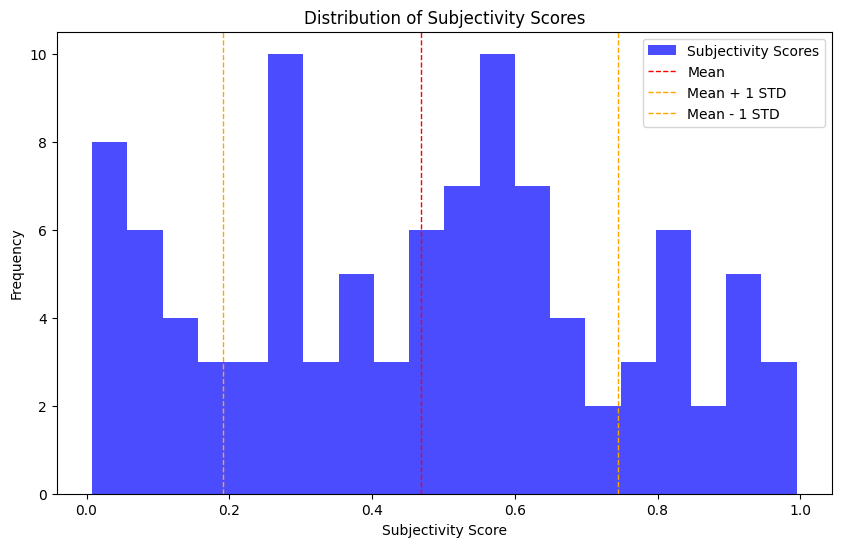

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your real dataframe here, replace this line with your actual DataFrame loading code
# df = pd.read_csv('your_file.csv')

# Assuming that 'textblob_subjectivity' column already exists in df

# Set the threshold for categorizing subjectivity
subjectivity_threshold = 0.4679596379193224

# Initialize a new column for subjectivity categories
df['subjectivity_category'] = 'factual'

# Categorize rows based on the subjectivity threshold
df.loc[df['textblob_subjectivity'] > subjectivity_threshold, 'subjectivity_category'] = 'personal opinion'

# Calculate subjectivity percentages
subjectivity_percentages = df['subjectivity_category'].value_counts(normalize=True) * 100

# Print mean and standard deviation of subjectivity scores
mean_subjectivity = df['textblob_subjectivity'].mean()
std_subjectivity = df['textblob_subjectivity'].std()

print("\nMean Subjectivity Score:", mean_subjectivity)
print("Standard Deviation of Subjectivity Score:", std_subjectivity)
print("\nSubjectivity Percentages:\n", subjectivity_percentages)

# Basic Exploratory Data Analysis (EDA)

# Histogram for Subjectivity Scores
plt.figure(figsize=(10, 6))
plt.hist(df['textblob_subjectivity'], bins=20, color='blue', alpha=0.7, label='Subjectivity Scores')
plt.axvline(mean_subjectivity, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean_subjectivity + std_subjectivity, color='orange', linestyle='dashed', linewidth=1, label='Mean + 1 STD')
plt.axvline(mean_subjectivity - std_subjectivity, color='orange', linestyle='dashed', linewidth=1, label='Mean - 1 STD')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()




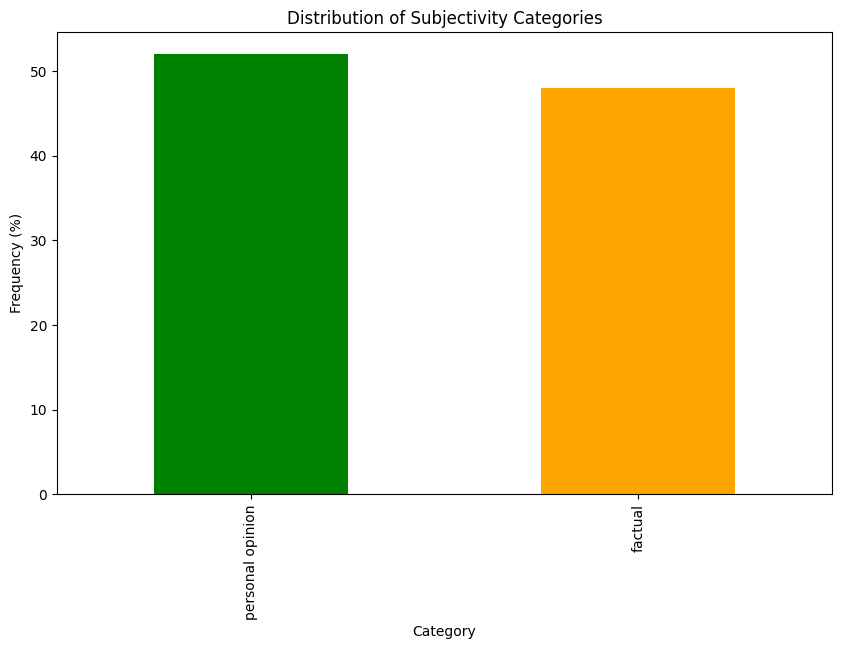

In [23]:
# Bar Chart for Subjectivity Categories
plt.figure(figsize=(10, 6))
df['subjectivity_category'].value_counts().plot(kind='bar', color=['green', 'orange'])
plt.title('Distribution of Subjectivity Categories')
plt.xlabel('Category')
plt.ylabel('Frequency (%)')
plt.show()

In [ ]:
import os

# Define the directory name
dir_name = "visualizations"

# Create the directory if it does not exist
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

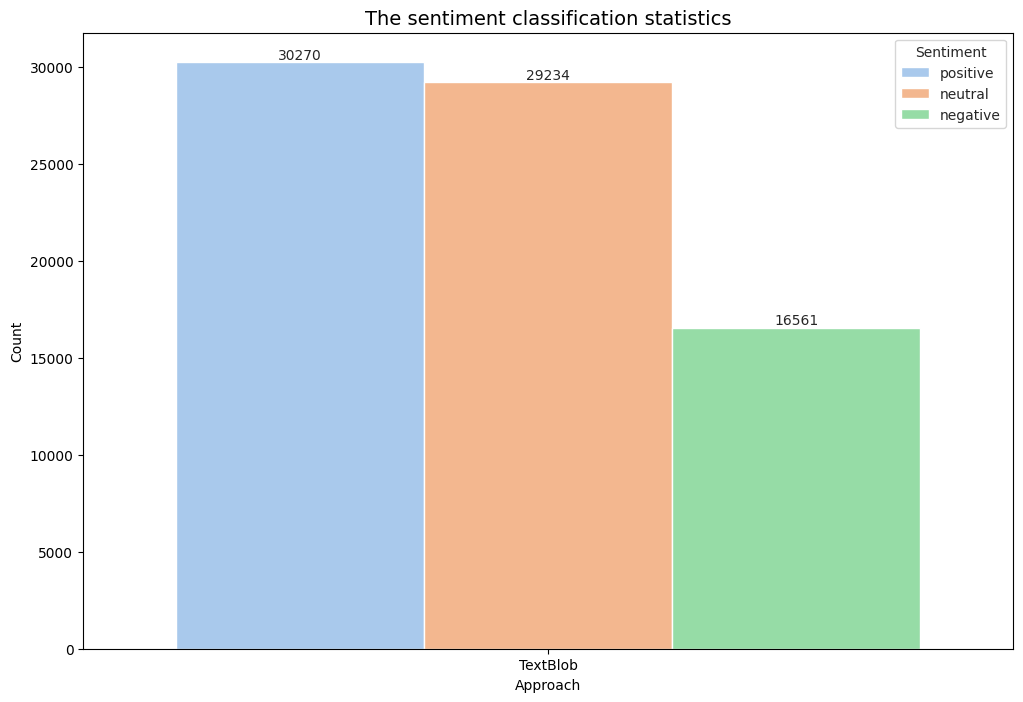

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get sentiment count for each approach

textblob_counts = df['senti_label_textblob'].value_counts().reset_index()

# Rename columns

textblob_counts.columns = ['Sentiment', 'Count']

# Add approach column

textblob_counts['Approach'] = 'TextBlob'

# Merge dataframes
plot_data = pd.concat([textblob_counts])

# Create barplot
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style("whitegrid")
s = sns.barplot(x="Approach", y="Count", data=plot_data, hue="Sentiment",saturation=.8,palette=sns.color_palette('pastel'))
ax.set_title('The sentiment classification statistics',fontsize=14)

# Add annotations
for patch in ax.patches:
    ax.annotate(f"{patch.get_height():.0f}", (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                ha='center', va='center', xytext =(0, 5), textcoords='offset points')

# Save plot
plt.savefig("visualizations/all sentiments.png")
plt.show()

In [ ]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,language,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),textblob_polarity,textblob_subjectivity,senti_textblob,senti_label_textblob
0,No Excuses 💙🇺🇸🇺🇦🌻,Space,#VoteBlue to save our Democracy. Support Ukraine with a donation to https://t.co/RMZicrP0cj\nViolence in any form is unacceptable https://t.co/zSY6XsKHkh,2008-08-10 02:28:16+00:00,930.0,4993.0,35705.0,False,2022-12-31 23:50:09+00:00,iranprotests set space similar twiterspaces space reports ukraine war runs hours day various hosts different backgrounds hoping best outcome iranrevolution iranianwomen,...,en,"['iranprotests', 'set', 'space', 'similar', 'twiterspaces', 'space', 'reports', 'ukraine', 'war', 'runs', 'hours', 'day', 'various', 'hosts', 'different', 'backgrounds', 'hoping', 'best', 'outcome', 'iranrevolution', 'iranianwomen']","['iranprotests', 'set', 'space', 'similar', 'twiterspaces', 'space', 'report', 'ukraine', 'war', 'run', 'hour', 'day', 'various', 'host', 'different', 'background', 'hoping', 'best', 'outcome', 'iranrevolution', 'iranianwomen']",iranprotests set space similar twiterspaces space report ukraine war run hour day various host different background hoping best outcome iranrevolution iranianwomen,"[('iranprotests', 'n'), ('set', 'v'), ('space', 'n'), ('similar', 'a'), ('twiterspaces', 'n'), ('space', 'n'), ('reports', 'n'), ('ukraine', 'a'), ('war', 'n'), ('runs', 'n'), ('hours', 'n'), ('day', 'n'), ('various', 'a'), ('hosts', 'n'), ('different', 'a'), ('backgrounds', 'n'), ('hoping', 'v'), ('best', 'a'), ('outcome', 'a'), ('iranrevolution', 'n'), ('iranianwomen', 'n')]",iranprotests set space similar twiterspaces space report ukraine war run hour day various host different background hop best outcome iranrevolution iranianwomen,0.250000,0.450000,1,positive
1,Bruno Azadi,Planète Terre,Class War & Rock'n'Roll - Blocked by some NIAC jesters and I don't care,2022-01-28 17:38:04+00:00,91.0,174.0,13590.0,False,2022-12-31 23:00:55+00:00,iranprotests iranrevolution mashamini iranrevolution friends comrades sisters brothers iran happy year free iran without khamenei without basij without sepahi without salami without irgc,...,en,"['iranprotests', 'iranrevolution', 'mashamini', 'iranrevolution', 'friends', 'comrades', 'sisters', 'brothers', 'iran', 'happy', 'year', 'free', 'iran', 'without', 'khamenei', 'without', 'basij', 'without', 'sepahi', 'without', 'salami', 'without', 'irgc']","['iranprotests', 'iranrevolution', 'mashamini', 'iranrevolution', 'friend', 'comrade', 'sister', 'brother', 'iran', 'happy', 'year', 'free', 'iran', 'without', 'khamenei', 'without', 'basij', 'without', 'sepahi', 'without', 'salami', 'without', 'irgc']",iranprotests iranrevolution mashamini iranrevolution friend comrade sister brother iran happy year free iran without khamenei without basij without sepahi without salami without irgc,"[('iranprotests', 'n'), ('iranrevolution', 'v'), ('mashamini', 'a'), ('iranrevolution', 'n'), ('friends', 'n'), ('comrades', 'v'), ('sisters', 'n'), ('brothers', 'n'), ('iran', 'v'), ('happy', 'a'), ('year', 'n'), ('free', 'a'), ('iran', 'n'), ('without', None), ('khamenei', 'n'), ('without', None), ('basij', 'n'), ('without', None), ('sepahi', 'n'), ('without', None), ('salami', 'n'), ('without', None), ('irgc', 'n')]",iranprotests iranrevolution mashamini iranrevolution friend comrades sister brother iran happy year free iran without khamenei without basij without sepahi without salami without irgc,0.600000,0.900000,1,positive
2,🇺🇦💙kellykenney 💙🇺🇦 🌊😎,"Independence, MO",Science edu #disabled #ParkinsonsDisease #Resister 💙 Vote #WomensRights #IranProtest #CivilRights #BLM #Democrat #Ukraine 🇺🇦 #BlueCrew #DemCast #BlueWave #FB,2022-11-09 01:52:18+00:00,3596.0,4717.0,25328.0,False,2022-12-31 22:52:53+00:00,people fight humanrights civilrights need support unprecedented iranrevolution people iran want voices h

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and sentiment, then count instances
month_sentiment_counts = df.groupby(['date', 'senti_label_textblob']).size().reset_index(name='count')

# Pivot the month_sentiment_counts dataframe
pivot_month_sentiment_counts = month_sentiment_counts.pivot(index='date', columns='senti_label_textblob', values='count')


# Set plot style
sns.set(style="whitegrid")

# Set color palette
colors = ["red", "gray", "blue"]

# Plot a line graph
plt.figure(figsize=(10, 8))
for i, sentiment in enumerate(['negative', 'neutral', 'positive']):
    plt.plot(pivot_month_sentiment_counts.index, pivot_month_sentiment_counts[sentiment], marker='o', color=colors[i], label=sentiment)
plt.title('Monthly Sentiment Classification of Iran Protest Tweets Using Textblob Analysis', fontsize=12)
plt.xlabel('Months', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Sentiments using Textblob')
plt.show()




KeyboardInterrupt: ignored

In [ ]:
output_path = '/content/drive/My Drive/tweets_textblob_complete.csv'
df.to_csv(output_path, index=False)

# Machine learning approach

In [6]:
file_path = '/content/drive/My Drive/tweets_textblob_complete.csv'
df = pd.read_csv(file_path, low_memory = False)

In [7]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,language,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),textblob_polarity,textblob_subjectivity,senti_textblob,senti_label_textblob
0,No Excuses 💙🇺🇸🇺🇦🌻,Space,#VoteBlue to save our Democracy. Support Ukrai...,2008-08-10 02:28:16+00:00,930.0,4993.0,35705.0,False,2022-12-31 23:50:09+00:00,iranprotests set space similar twiterspaces sp...,...,en,"['iranprotests', 'set', 'space', 'similar', 't...","['iranprotests', 'set', 'space', 'similar', 't...",iranprotests set space similar twiterspaces sp...,"[('iranprotests', 'n'), ('set', 'v'), ('space'...",iranprotests set space similar twiterspaces ...,0.250000,0.450000,1,positive
1,Bruno Azadi,Planète Terre,Class War & Rock'n'Roll - Blocked by some NIAC...,2022-01-28 17:38:04+00:00,91.0,174.0,13590.0,False,2022-12-31 23:00:55+00:00,iranprotests iranrevolution mashamini iranrevo...,...,en,"['iranprotests', 'iranrevolution', 'mashamini'...","['iranprotests', 'iranrevolution', 'mashamini'...",iranprotests iranrevolution mashamini iranrevo...,"[('iranprotests', 'n'), ('iranrevolution', 'v'...",iranprotests iranrevolution mashamini iranre...,0.600000,0.900000,1,positive
2,🇺🇦💙kellykenney 💙🇺🇦 🌊😎,"Independence, MO",Science edu #disabled #ParkinsonsDisease #Resi...,2022-11-09 01:52:18+00:00,3596.0,4717.0,25328.0,False,2022-12-31 22:52:53+00:00,people fight humanrights civilrights need supp...,...,en,"['people', 'fight', 'humanrights', 'civilright...","['people', 'fight', 'humanrights', 'civilright...",people fight humanrights civilrights need supp...,"[('people', 'n'), ('fight', None), ('humanrigh...",people fight humanrights civilrights need su...,0.600000,0.900000,1,positive
3,ICAN2021 🇮🇪,The European Union(EU),Dermot Dorgan | Data Analysis & Risk Manageme...,2020-12-30 00:06:54+00:00,629.0,88.0,5124.0,False,2022-12-31 20:08:00+00:00,anti islam anti patriarchy protests continue i...,...,en,"['anti', 'islam', 'anti', 'patriarchy', 'prote...","['anti', 'islam', 'anti', 'patriarchy', 'prote...",anti islam anti patriarchy protest continue ir...,"[('anti', 'a'), ('islam', 'n'), ('anti', 'a'),...",anti islam anti patriarchy protest continue ...,0.216667,0.416667,1,positive
4,Salah Uddin Shoaib Choudhury,"Dhaka, Bangladesh","Editor, BLiTZ । Multi -Award-Winning Investiga...",2018-11-09 09:29:52+00:00,469.0,913.0,2593.0,False,2022-12-31 19:53:32+00:00,continuing cruel persecution iranians eyes vil...,...,en,"['continuing', 'cruel', 'persecution', 'irania...","['continuing', 'cruel', 'persecution', 'irania...",continuing cruel persecution iranian eye villa...,"[('continuing', 'v'), ('cruel', 'a'), ('persec...",continue cruel persecution iranian eye villa...,-1.000000,1.000000,-1,negative


# New Section

In [ ]:
#sample data 3000
positive_df = df[df["senti_textblob"] == 1]
positive_df = positive_df[:1000] #1000 positive sentiment
neutral_df = df[df["senti_textblob"] == 0]
neutral_df = neutral_df[:1000] #1000 neutral sentiment
negative_df = df[df["senti_textblob"] == -1]
negative_df = negative_df[:1000] #1000 neutral sentiment

In [ ]:
df=[positive_df, neutral_df, negative_df]
df=pd.concat(df)
df=df.reset_index(drop=True)
output_path = '/content/drive/My Drive/supervised_sample_datasets.csv'
df.to_csv(output_path, index=False)

In [ ]:
#after manual check
negative_num=len(df[df['senti_textblob'] < 0])
print("negative:", negative_num)
neutral_num=len(df[df['senti_textblob'] == 0])
print("neutral", neutral_num)
positive_num=len(df[df['senti_textblob'] > 0])
print("positive", positive_num)

negative: 1000
neutral 1000
positive 1000


In [ ]:
#BoW
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import word_tokenize

def bag_of_words(df):
    bow_vectorizer = CountVectorizer()
    bow = bow_vectorizer.fit_transform(df['lemma_sentence(with POS)'])
    return bow

df_bow=bag_of_words(df)
df_bow.shape

(3000, 4366)

In [ ]:
#TF-IDF
def tf_idf(df):
    tf_idf_vectorizer = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
    tf_idf_vectorizer = TfidfVectorizer(norm='l2') #extract features
    tfidf = tf_idf_vectorizer.fit_transform(df['lemma_sentence(with POS)']) #vectors
    return tfidf
df_tfidf=tf_idf(df)
df_tfidf.shape

(3000, 4366)

## Bag of words with Text blob

In [ ]:
#BoW for three classification models
#split the train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_bow, df['senti_textblob'],test_size = 0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

def bag_of_words(df):
    bow_vectorizer = CountVectorizer()
    bow = bow_vectorizer.fit_transform(df['lemma_sentence(with POS)'])
    return bow, bow_vectorizer

# Generate BoW features
df_bow, vectorizer = bag_of_words(df)

# Splitting the data
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(df_bow, df['senti_label_textblob'], test_size=0.20, random_state=42)

# Print sentiment distribution in the training set
print("Sentiment distribution in the training set:")
print(y_train_bow.value_counts(normalize=True))

# Print sentiment distribution in the test set
print("\nSentiment distribution in the test set:")
print(y_test_bow.value_counts(normalize=True))

Sentiment distribution in the training set:
negative    0.339167
neutral     0.334583
positive    0.326250
Name: senti_label_textblob, dtype: float64

Sentiment distribution in the test set:
positive    0.361667
neutral     0.328333
negative    0.310000
Name: senti_label_textblob, dtype: float64


### SVM (SVC)

In [ ]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter configuration space
param_dist = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize the random search
random_search = RandomizedSearchCV(svm.SVC(), param_distributions=param_dist, cv=10, verbose=2, n_iter=100, random_state=42)

# Execute the random search
random_search.fit(X_train_bow, y_train_bow)

# Print the best hyperparameters
print("Best Parameters: ", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.0s
[CV] END ..................................C=0

In [ ]:
from sklearn import svm

# Training the SVM model with optimal hyperparameters
model_svm_optimized = svm.SVC(C=1.0, kernel='linear')
model_svm_optimized.fit(X_train_bow, y_train_bow)

SVC(kernel='linear')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM model with optimal hyperparameters
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_train_bow, y_train_bow)

# Use the trained model to make predictions on the test set
prediction_svc = model_svc.predict(X_test_bow)

# Print the classification report
print(classification_report(y_test_bow, prediction_svc))

              precision    recall  f1-score   support

    negative       0.87      0.83      0.85       186
     neutral       0.84      0.91      0.87       197
    positive       0.91      0.88      0.90       217

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



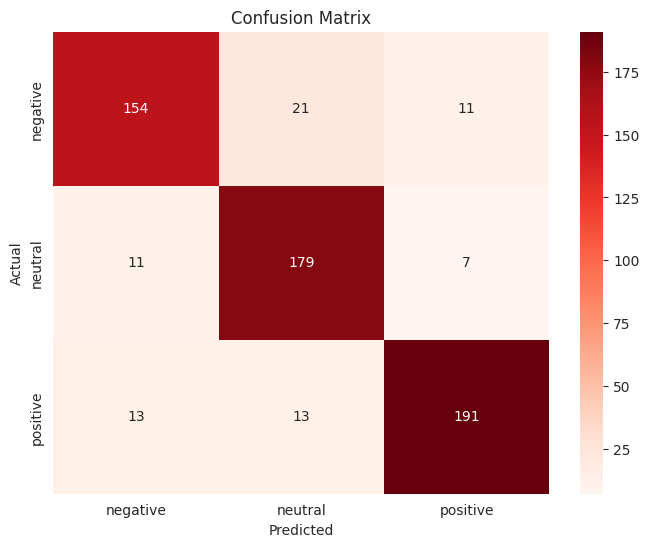

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the test data
y_pred = model_svc.predict(X_test_bow)

# Compute the confusion matrix
cm = confusion_matrix(y_test_bow, y_pred)

# Define the labels of your confusion matrix. Replace these with your actual labels
labels = model_svc.classes_

plt.figure(figsize=(8, 6))

# Use seaborn to plot a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


### Multinomial Naïve Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

# Parameters for Multinomial Naive Bayes
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
                'fit_prior':[True, False]}

# Initialize a Multinomial Naive Bayes model
model_nb = MultinomialNB()

# Set up the random search with 10-fold cross validation
NB_RandomGrid = RandomizedSearchCV(estimator=model_nb,
                                   param_distributions=param_grid_nb,
                                   cv=10,
                                   verbose=2,
                                   n_jobs=4)

# Train the model
NB_RandomGrid.fit(X_train_bow, y_train_bow)

# Print the best parameters
print(NB_RandomGrid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'fit_prior': False, 'alpha': 0.01}


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Training the MultinomialNB model with optimal hyperparameters
model_nb_optimized = MultinomialNB(alpha=0.01, fit_prior=False)
model_nb_optimized.fit(X_train_bow, y_train_bow)

MultinomialNB(alpha=0.01, fit_prior=False)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Multinomial Naive Bayes model
model_nb = MultinomialNB(alpha=0.01, fit_prior=False)
model_nb.fit(X_train_bow, y_train_bow)

# Predict labels for the test set
prediction_nb = model_nb.predict(X_test_bow)

# Print the classification report
print(classification_report(y_test_bow, prediction_nb))

              precision    recall  f1-score   support

    negative       0.78      0.84      0.81       186
     neutral       0.94      0.70      0.80       197
    positive       0.75      0.86      0.80       217

    accuracy                           0.80       600
   macro avg       0.82      0.80      0.80       600
weighted avg       0.82      0.80      0.80       600



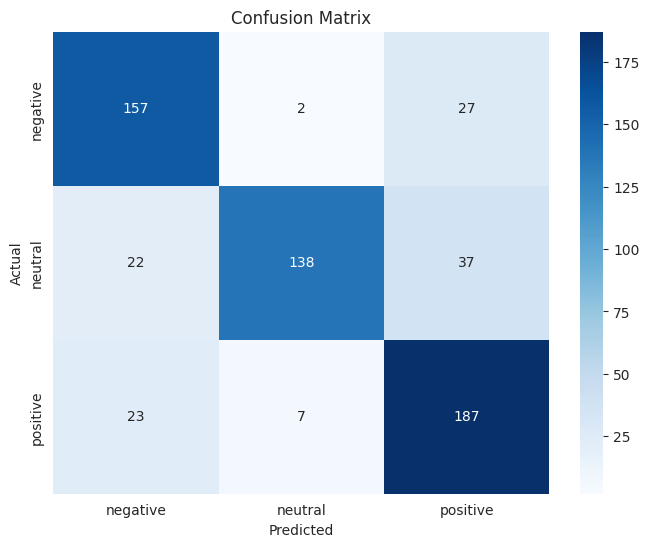

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test_bow, prediction_nb)

# Define the labels of your confusion matrix. Replace these with your actual labels
labels = model_nb.classes_

plt.figure(figsize=(8, 6))

# Use seaborn to plot a heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()



### Random forest

In [ ]:
import numpy as np

# Parameters for random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)] # Number of trees in random forest
max_features = ['auto', 'sqrt','log2'] # Number of features to consider at every split
max_depth = [10,20,30,40] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 15] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10] # Minimum number of samples required at each leaf node

# Create the param grid
param_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(param_grid_forest)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
#best parameters for RF(with BoW)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble._forest import RandomForestClassifier
model_forest = RandomForestClassifier()
RF_RandomGrid = RandomizedSearchCV(estimator = model_forest, param_distributions = param_grid_forest, cv = 10, verbose=2, n_jobs = 4)
RF_RandomGrid.fit(X_train_bow, y_train_bow)
RF_RandomGrid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40}

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Parameters for random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)] # Number of trees in random forest
max_features = ['auto', 'sqrt','log2'] # Number of features to consider at every split
max_depth = [10,20,30,40] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 15] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10] # Minimum number of samples required at each leaf node

# Create the param grid
param_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Initialize the model
model_forest = RandomForestClassifier()

# Instantiate RandomizedSearchCV object with 10-fold cross validation
RF_RandomGrid = RandomizedSearchCV(estimator = model_forest, param_distributions = param_grid_forest, cv = 10, verbose=2, n_jobs = 4)

# Fit the RandomizedSearchCV object to the data
RF_RandomGrid.fit(X_train_bow, y_train_bow)

# Print the best parameters
print("Best Parameters: ", RF_RandomGrid.best_params_)

# Initialize the model with the best hyperparameters
model_forest = RandomForestClassifier(n_estimators=RF_RandomGrid.best_params_['n_estimators'],
                                      min_samples_split=RF_RandomGrid.best_params_['min_samples_split'],
                                      min_samples_leaf=RF_RandomGrid.best_params_['min_samples_leaf'],
                                      max_features=RF_RandomGrid.best_params_['max_features'],
                                      max_depth=RF_RandomGrid.best_params_['max_depth'])

# Fit the model on the training data
model_forest.fit(X_train_bow, y_train_bow)

# Predict labels for the test set
prediction_rf = model_forest.predict(X_test_bow)

# Print the classification report
print(classification_report(y_test_bow, prediction_rf))


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters:  {'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

    negative       0.87      0.72      0.79       186
     neutral       0.79      0.90      0.84       197
    positive       0.83      0.85      0.84       217

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600



In [ ]:
from sklearn.metrics import accuracy_score

# List to store model names and their corresponding accuracy scores
models = []
scores = []

# For Naive Bayes Model
models.append('Multinomial Naive Bayes')
scores.append(accuracy_score(y_test_bow, prediction_nb))

# For Support Vector Machine
models.append('Suppot Vector Machine (SVM)')
scores.append(accuracy_score(y_test_bow, prediction_svc))

# For Random Forest
models.append('Random Forest')
scores.append(accuracy_score(y_test_bow, prediction_rf))


In [ ]:
# Print each model and its corresponding accuracy score with BOW
for model, score in zip(models, scores):
    print(f'{model}: {score*100:.2f}%')


Multinomial Naive Bayes: 80.33%
Suppot Vector Machine (SVM): 87.33%
Random Forest: 82.50%


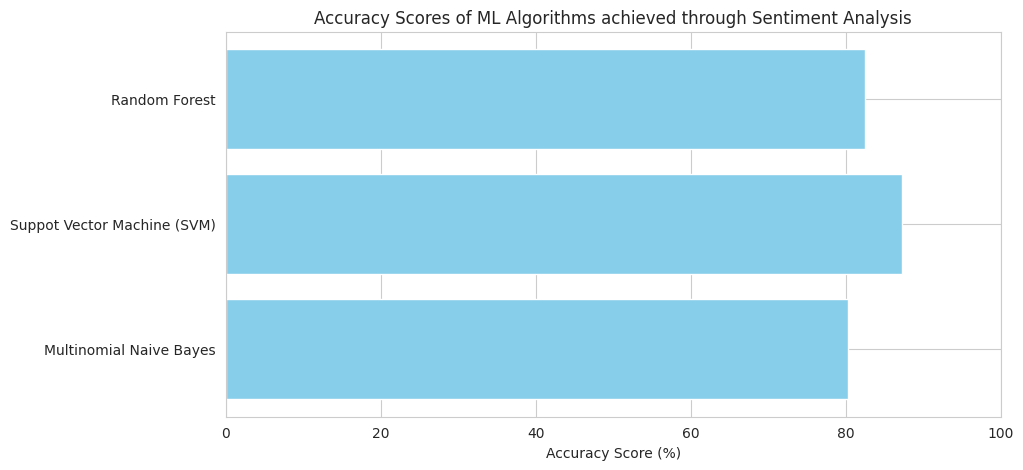

In [ ]:
plt.figure(figsize=(10, 5))
# Convert scores to percentage and plot
plt.barh(models, [score * 100 for score in scores], color='skyblue')
plt.xlabel('Accuracy Score (%)')
plt.title('Accuracy Scores of ML Algorithms achieved through Sentiment Analysis')
plt.xlim(0, 100)  # assuming accuracy is measured between 0% and 100%
plt.show()


## TF-IDF with Text blob

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def tfidf_features(df):
    tfidf_vectorizer = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
    tfidf = tfidf_vectorizer.fit_transform(df['lemma_sentence(with POS)'])
    return tfidf, tfidf_vectorizer

# Generate TF-IDF features
df_tfidf, vectorizer = tfidf_features(df)

# Splitting the data
X_train_Tf, X_test_Tf, y_train_Tf, y_test_Tf = train_test_split(df_tfidf, df['senti_label_textblob'], test_size=0.2, random_state=42)

# Print sentiment distribution in the training set
print("Sentiment distribution in the training set:")
print(y_train_Tf.value_counts(normalize=True))

# Print sentiment distribution in the test set
print("\nSentiment distribution in the test set:")
print(y_test_Tf.value_counts(normalize=True))

Sentiment distribution in the training set:
negative    0.339167
neutral     0.334583
positive    0.326250
Name: senti_label_textblob, dtype: float64

Sentiment distribution in the test set:
positive    0.361667
neutral     0.328333
negative    0.310000
Name: senti_label_textblob, dtype: float64


### SVM (SVC)

In [ ]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter configuration space
param_dist = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Initialize the random search
random_search = RandomizedSearchCV(svm.SVC(), param_distributions=param_dist, cv=10, verbose=2, n_iter=100, random_state=42)

# Execute the random search
random_search.fit(X_train_Tf, y_train_Tf)

# Print the best hyperparameters
print("Best Parameters: ", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.6s
[CV] END ..................................C=0

In [ ]:
from sklearn import svm

# Training the SVM model with optimal hyperparameters
model_svm_optimized = svm.SVC(C=10, kernel='linear')
model_svm_optimized.fit(X_train_Tf, y_train_Tf)

SVC(C=10, kernel='linear')

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM model with optimal hyperparameters
model_svc = SVC(kernel='linear', C=10)
model_svc.fit(X_train_Tf, y_train_Tf)

# Use the trained model to make predictions on the test set
prediction_svc = model_svc.predict(X_test_Tf)

# Print the classification report
print(classification_report(y_test_Tf, prediction_svc))

              precision    recall  f1-score   support

    negative       0.77      0.83      0.80       186
     neutral       0.84      0.80      0.82       197
    positive       0.84      0.82      0.83       217

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



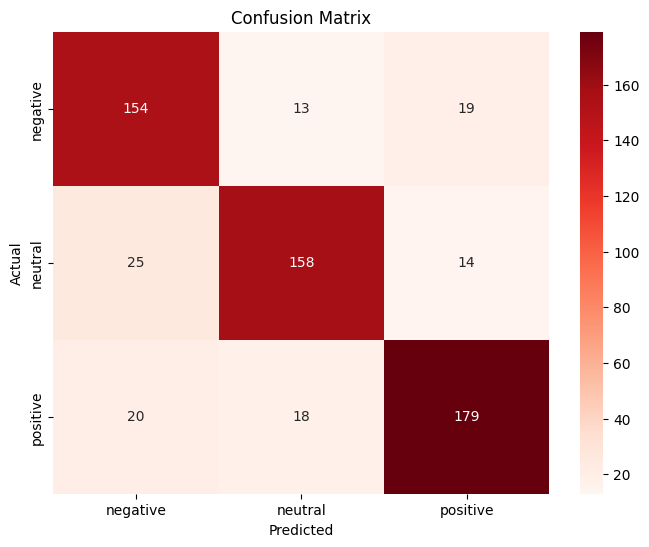

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the test data
y_pred = model_svc.predict(X_test_Tf)

# Compute the confusion matrix
cm = confusion_matrix(y_test_Tf, y_pred)

# Define the labels of your confusion matrix. Replace these with your actual labels
labels = model_svc.classes_

plt.figure(figsize=(8, 6))

# Use seaborn to plot a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

### Multinomial Naïve Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

# Parameters for Multinomial Naive Bayes
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
                'fit_prior':[True, False]}

# Initialize a Multinomial Naive Bayes model
model_nb = MultinomialNB()

# Set up the random search with 10-fold cross validation
NB_RandomGrid = RandomizedSearchCV(estimator=model_nb,
                                   param_distributions=param_grid_nb,
                                   cv=10,
                                   verbose=2,
                                   n_jobs=4)

# Train the model
NB_RandomGrid.fit(X_train_Tf, y_train_Tf)

# Print the best parameters
print(NB_RandomGrid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'fit_prior': True, 'alpha': 0.01}


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Training the MultinomialNB model with optimal hyperparameters
model_nb_optimized = MultinomialNB(alpha=0.01, fit_prior=True)
model_nb_optimized.fit(X_train_Tf, y_train_Tf)

MultinomialNB(alpha=0.01)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Multinomial Naive Bayes model
model_nb = MultinomialNB(alpha=0.01, fit_prior=True)
model_nb.fit(X_train_Tf, y_train_Tf)

# Predict labels for the test set
prediction_nb = model_nb.predict(X_test_Tf)

# Print the classification report
print(classification_report(y_test_Tf, prediction_nb))

              precision    recall  f1-score   support

    negative       0.76      0.74      0.75       186
     neutral       0.91      0.69      0.78       197
    positive       0.68      0.85      0.76       217

    accuracy                           0.76       600
   macro avg       0.78      0.76      0.76       600
weighted avg       0.78      0.76      0.76       600



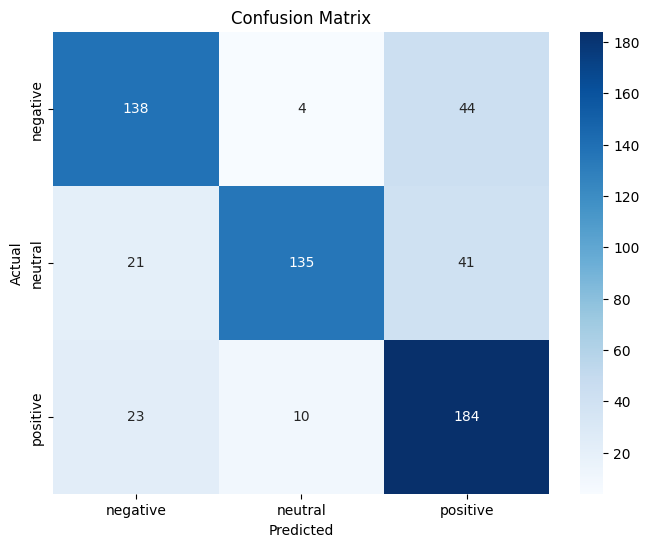

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cf_matrix = confusion_matrix(y_test_Tf, prediction_nb)

# Define the labels of your confusion matrix. Replace these with your actual labels
labels = model_nb.classes_

plt.figure(figsize=(8, 6))

# Use seaborn to plot a heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

### Random forest

In [ ]:
import numpy as np

# Parameters for random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)] # Number of trees in random forest
max_features = ['auto', 'sqrt','log2'] # Number of features to consider at every split
max_depth = [10,20,30,40] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 15] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10] # Minimum number of samples required at each leaf node

# Create the param grid
param_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(param_grid_forest)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Parameters for random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)] # Number of trees in random forest
max_features = ['auto', 'sqrt','log2'] # Number of features to consider at every split
max_depth = [10,20,30,40] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 15] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10] # Minimum number of samples required at each leaf node

# Create the param grid
param_grid_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Initialize the model
model_forest = RandomForestClassifier()

# Instantiate RandomizedSearchCV object with 10-fold cross validation
RF_RandomGrid = RandomizedSearchCV(estimator = model_forest, param_distributions = param_grid_forest, cv = 10, verbose=2, n_jobs = 4)

# Fit the RandomizedSearchCV object to the data
RF_RandomGrid.fit(X_train_Tf, y_train_Tf)

# Print the best parameters
print("Best Parameters: ", RF_RandomGrid.best_params_)

# Initialize the model with the best hyperparameters
model_forest = RandomForestClassifier(n_estimators=RF_RandomGrid.best_params_['n_estimators'],
                                      min_samples_split=RF_RandomGrid.best_params_['min_samples_split'],
                                      min_samples_leaf=RF_RandomGrid.best_params_['min_samples_leaf'],
                                      max_features=RF_RandomGrid.best_params_['max_features'],
                                      max_depth=RF_RandomGrid.best_params_['max_depth'])

# Fit the model on the training data
model_forest.fit(X_train_Tf, y_train_Tf)

# Predict labels for the test set
prediction_rf = model_forest.predict(X_test_Tf)

# Print the classification report
print(classification_report(y_test_Tf, prediction_rf))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters:  {'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
              precision    recall  f1-score   support

    negative       0.88      0.75      0.81       186
     neutral       0.80      0.87      0.83       197
    positive       0.80      0.83      0.81       217

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [ ]:
from sklearn.metrics import accuracy_score

# List to store model names and their corresponding accuracy scores
models = []
scores = []

# For Naive Bayes Model
models.append('Multinomial Naive Bayes')
scores.append(accuracy_score(y_test_Tf, prediction_nb))

# For Support Vector Machine
models.append('Suppot Vector Machine (SVM)')
scores.append(accuracy_score(y_test_Tf, prediction_svc))

# For Random Forest
models.append('Random Forest')
scores.append(accuracy_score(y_test_Tf, prediction_rf))

In [ ]:
# Print each model and its corresponding accuracy score with BOW
for model, score in zip(models, scores):
    print(f'{model}: {score*100:.2f}%')


Multinomial Naive Bayes: 76.17%
Suppot Vector Machine (SVM): 81.83%
Random Forest: 80.50%


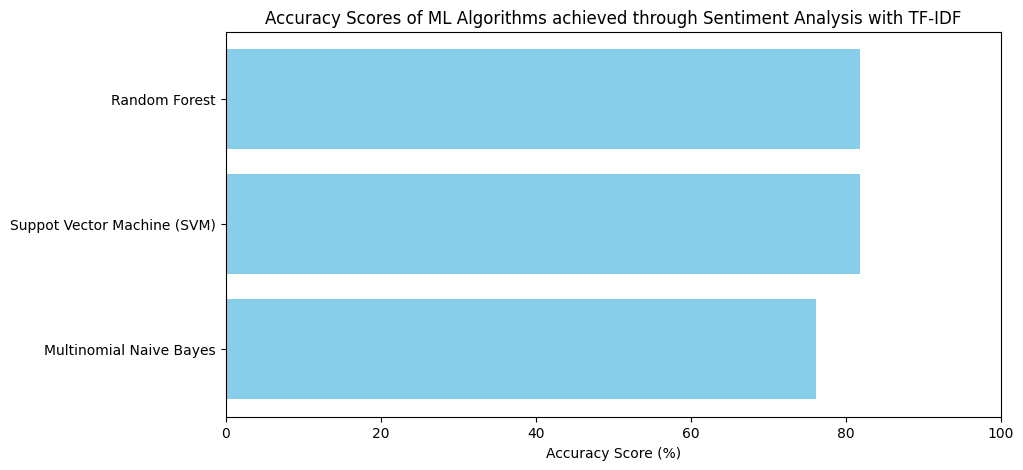

In [ ]:
plt.figure(figsize=(10, 5))
# Convert scores to percentage and plot
plt.barh(models, [score * 100 for score in scores], color='skyblue')
plt.xlabel('Accuracy Score (%)')
plt.title('Accuracy Scores of ML Algorithms achieved through Sentiment Analysis with TF-IDF')
plt.xlim(0, 100)  # assuming accuracy is measured between 0% and 100%
plt.show()

# Word Clouds

In [ ]:
pip install wordcloud


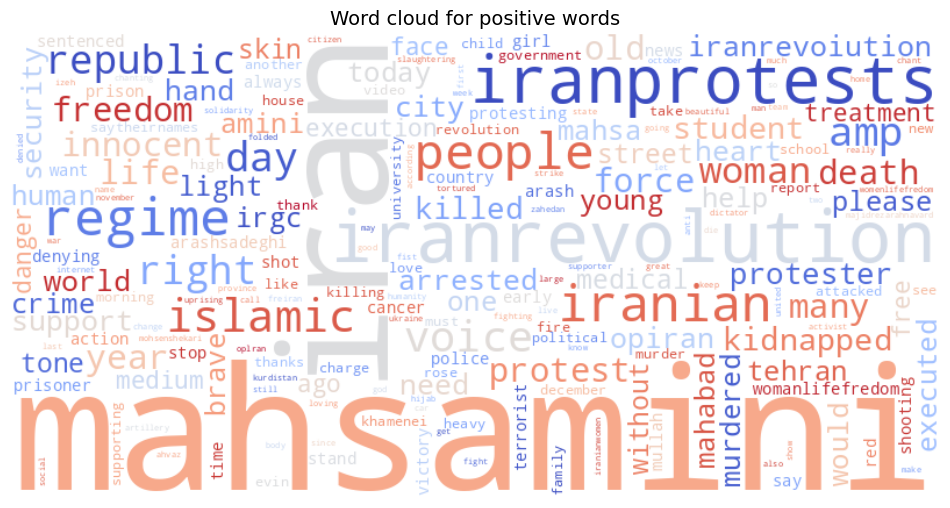

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from collections import defaultdict
import os

# First, filter the dataframe to consider only rows where sentiment_label_textblob is 'positive'
positive_df = df[df['senti_label_textblob'] == 'positive']

# Initialize dictionary to store word frequencies for positive sentiment
positive_word_freq = defaultdict(int)

# Iterate over rows of the positive DataFrame to populate the dictionary
for index, row in positive_df.iterrows():
    words = row['lemma_sentence'].split()

    # Increment the word count
    for word in words:
        word = word.split('_')[0]  # Strip off the POS
        positive_word_freq[word] += 1

def create_wordcloud(data, colormap):
    # Create a WordCloud object
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400,
        colormap=colormap,
        max_font_size=150,  # Adjusting maximum font size
        contour_width=3,    # Adding contour
        contour_color='blue'  # Setting contour color
    ).generate_from_frequencies(data)

    # Plotting the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word cloud for positive words', fontsize=14)

    # Check if "visualizations/" directory exists; if not, create it
    if not os.path.exists("visualizations"):
        os.makedirs("visualizations")

    plt.savefig("visualizations/positive_lemma_wordcloud.png")
    plt.show()

# Create word cloud for positive sentiment
create_wordcloud(positive_word_freq, 'coolwarm')  # Using 'coolwarm' colormap for enhanced visuals





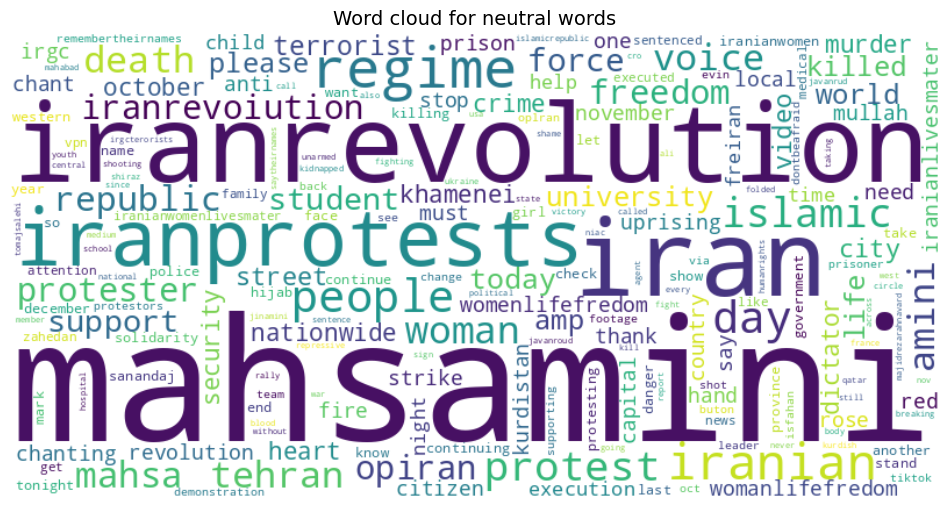

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from collections import defaultdict
import os

# Filter the dataframe to consider only rows where sentiment_label_textblob is 'neutral'
neutral_df = df[df['senti_label_textblob'] == 'neutral']

# Initialize dictionary to store word frequencies for neutral sentiment
neutral_word_freq = defaultdict(int)

# Iterate over rows of the neutral DataFrame to populate the dictionary
for index, row in neutral_df.iterrows():
    words = row['lemma_sentence'].split()

    # Increment the word count
    for word in words:
        word = word.split('_')[0]  # Strip off the POS
        neutral_word_freq[word] += 1

def create_wordcloud(data, colormap):
    # Create a WordCloud object
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400,
        colormap=colormap,
        max_font_size=150,  # Adjusting maximum font size
        contour_width=3,    # Adding contour
        contour_color='purple'  # Setting contour color
    ).generate_from_frequencies(data)

    # Plotting the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word cloud for neutral words', fontsize=14)

    # Check if "visualizations/" directory exists; if not, create it
    if not os.path.exists("visualizations"):
        os.makedirs("visualizations")

    plt.savefig("visualizations/neutral_lemma_wordcloud.png")
    plt.show()

# Create word cloud for neutral sentiment
create_wordcloud(neutral_word_freq, 'viridis')  # Using 'viridis' colormap for enhanced visuals


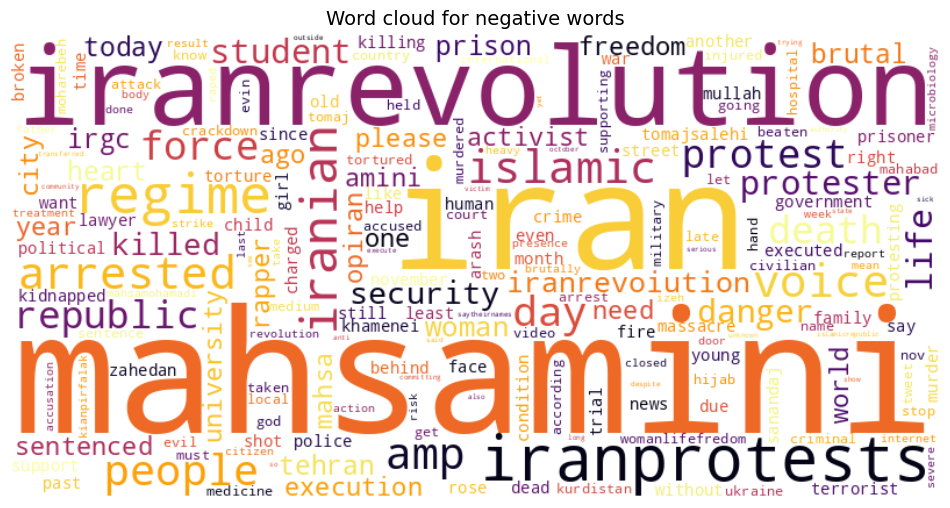

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from collections import defaultdict
import os

# Filter the dataframe to consider only rows where sentiment_label_textblob is 'negative'
negative_df = df[df['senti_label_textblob'] == 'negative']

# Initialize dictionary to store word frequencies for negative sentiment
negative_word_freq = defaultdict(int)

# Iterate over rows of the negative DataFrame to populate the dictionary
for index, row in negative_df.iterrows():
    words = row['lemma_sentence'].split()

    # Increment the word count
    for word in words:
        word = word.split('_')[0]  # Strip off the POS
        negative_word_freq[word] += 1

def create_wordcloud(data, colormap):
    # Create a WordCloud object
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400,
        colormap=colormap,
        max_font_size=150,  # Adjusting maximum font size
        contour_width=3,    # Adding contour
        contour_color='darkred'  # Setting contour color to a dark shade of red
    ).generate_from_frequencies(data)

    # Plotting the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word cloud for negative words', fontsize=14)

    # Check if "visualizations/" directory exists; if not, create it
    if not os.path.exists("visualizations"):
        os.makedirs("visualizations")

    plt.savefig("visualizations/negative_lemma_wordcloud.png")
    plt.show()

# Create word cloud for negative sentiment
create_wordcloud(negative_word_freq, 'inferno')  # Using 'inferno' colormap for enhanced visuals
